In [4]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
#from keras.layers.core import Dense,Activation,Dropout
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, GRU, BatchNormalization, TimeDistributed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#Split the train and test set for mist dataset

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
#X_train,X_test has matrix multiplication value for the image
#y_train,y_test has labels

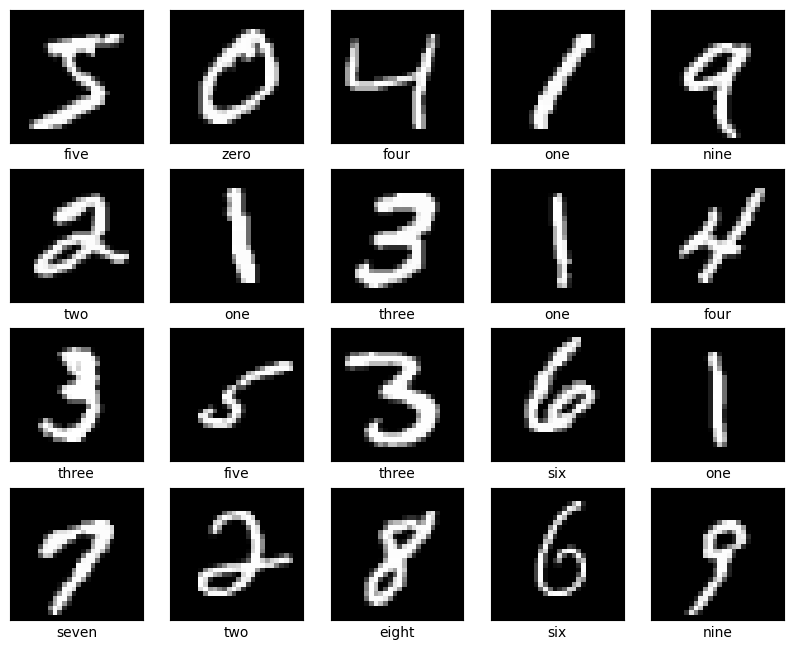

In [24]:
#Plot the image
col_name=['zero','one','two','three','four','five','six','seven','eight','nine']
plt.figure(figsize=(10, 10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap='gray')
    plt.xlabel(col_name[y_train[i]])
plt.show()

In [26]:
X_train.shape

(60000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

In [7]:
#Converting 3d to 2d its support in ANN module
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [8]:
#Convert target value from label from one hot encoding vector
#Split the label as 10 classes
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [33]:
#Create base neural network
# Create base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])


C:\Users\Arun\anaconda3\envs\aiml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#to check model summary
#dense parameter calculated as output channel*(input channel+1)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#Compiling the model as configuring with loss,optimiser and metrics
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=100,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7807 - loss: 4.0689 - val_accuracy: 0.9267 - val_loss: 0.3412
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9339 - loss: 0.2703 - val_accuracy: 0.9398 - val_loss: 0.2548
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9547 - loss: 0.1684 - val_accuracy: 0.9477 - val_loss: 0.2029
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9624 - loss: 0.1358 - val_accuracy: 0.9548 - val_loss: 0.1694
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9684 - loss: 0.1108 - val_accuracy: 0.9603 - val_loss: 0.1581
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9731 - loss: 0.0952 - val_accuracy: 0.9625 - val_loss: 0.1704
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9745 - loss: 0.0874 - val_accuracy: 0.9612 - val_loss: 0.1615
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9776 - loss: 0.0750 - val_accuracy: 0.

In [39]:
#predicting the labels
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
y_pred[0]# predict the value for all the vector but we need maximum one

array([7.0897350e-04, 8.3957952e-01, 5.6104624e-01, 7.7009648e-01,
       4.1714875e-06, 6.6374563e-02, 7.9480311e-10, 9.9990177e-01,
       7.8541960e-04, 1.0919860e-01], dtype=float32)

In [41]:
y_pred=np.argmax(y_pred,axis=1)#we get the index of maximum value in encoded vector

In [42]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
#convert the test data set as well
y_test=np.argmax(y_test,axis=1)

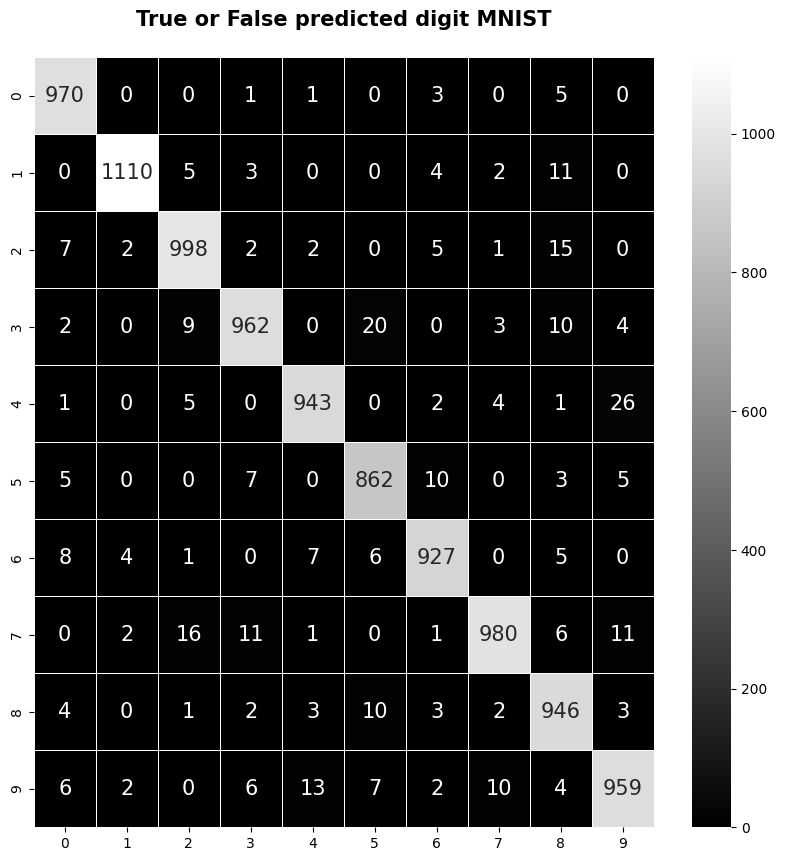

In [51]:
#confusion_matrix for digit mnist
cf=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(cf,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [49]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [52]:
#to check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.94      0.97      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [55]:
history.history

{'accuracy': [0.8630833625793457,
  0.9380666613578796,
  0.9547666907310486,
  0.9620333313941956,
  0.9657666683197021,
  0.9715666770935059,
  0.9728833436965942,
  0.9754499793052673,
  0.9779333472251892,
  0.9807666540145874],
 'loss': [1.3431694507598877,
  0.2523287832736969,
  0.1695908159017563,
  0.13697536289691925,
  0.12111583352088928,
  0.10145203769207001,
  0.09339418262243271,
  0.08347277343273163,
  0.07742470502853394,
  0.06791744381189346],
 'val_accuracy': [0.9266999959945679,
  0.9398000240325928,
  0.947700023651123,
  0.954800009727478,
  0.9603000283241272,
  0.9624999761581421,
  0.9611999988555908,
  0.9609000086784363,
  0.9621000289916992,
  0.9671000242233276],
 'val_loss': [0.3412242531776428,
  0.25481387972831726,
  0.20288227498531342,
  0.1693504899740219,
  0.15809905529022217,
  0.17035400867462158,
  0.1615026593208313,
  0.17105086147785187,
  0.15870130062103271,
  0.15258093178272247]}

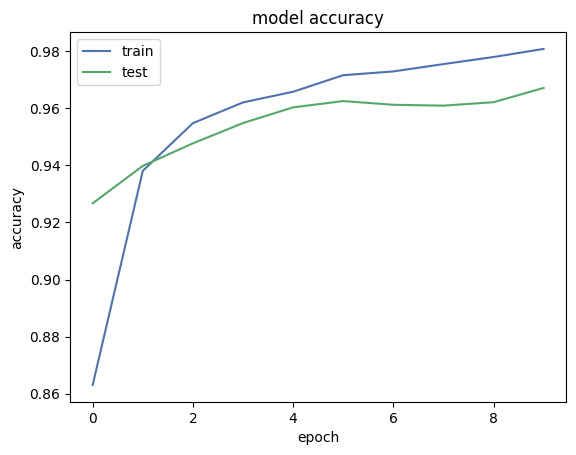

In [53]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


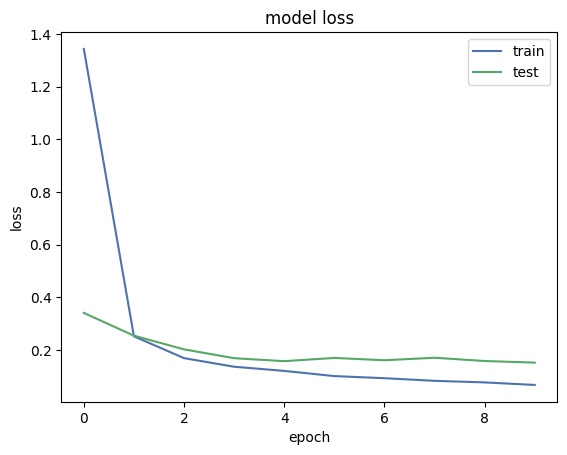

In [56]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


In [63]:
unique_y_test=np.unique(y_test)

In [64]:
unique_y_test

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [67]:
X_test.shape

(10000, 784)

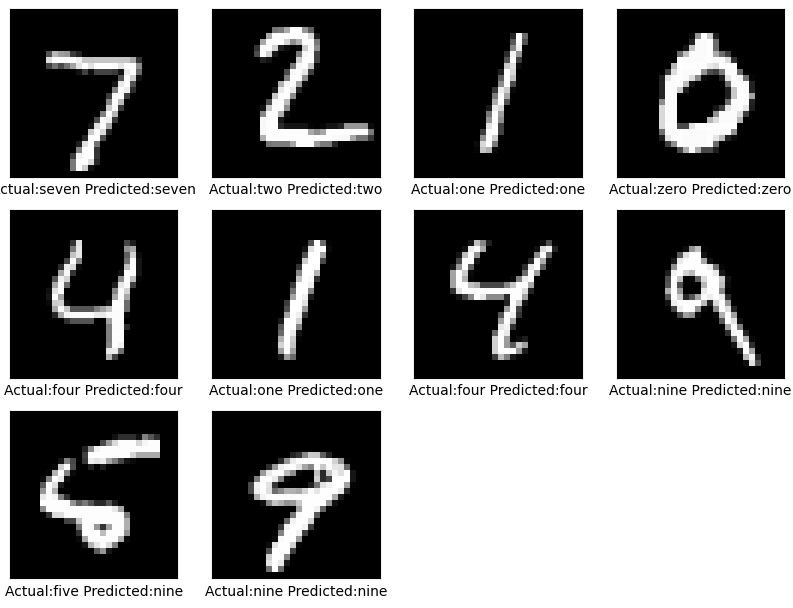

In [68]:
#to check the image of text data set
col_name=['zero','one','two','three','four','five','six','seven','eight','nine']
plt.figure(figsize=(10, 10))

for i in unique_y_test:
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.xlabel(f'Actual:{col_name[y_test[i]]} Predicted:{col_name[y_pred[i]]}')
plt.show()

# Data Preparation:
Split the MNIST dataset into training and test sets.
The input data (images) are 3D arrays (count, row, column). Convert them to 2D arrays (count, row * column).
Encode the target labels (digits) as one-hot encoded vectors.
# Model Creation:
Use Keras Sequential to create a neural network model.
Add layers one by one using the Dense method.
Specify the activation function (useful for introducing non-linearity).
Define the architecture of the neural network based on your desired accuracy.
# Model Summary:
Calculate the number of parameters for each Dense layer: (output channels) * (input channels + 1).
This gives you an idea of the model’s complexity.
# Model Compilation:
Configure the training process:
Choose an optimizer (e.g., Adam, SGD) to update the model weights during training.
Define the loss function (e.g., categorical cross-entropy) to measure the difference between actual and predicted values.
Specify evaluation metrics (e.g., accuracy, precision, recall).
# Model Training:
Fit the model using the training set.
Set batch size (number of training samples per batch) and epochs (how many times the entire dataset passes through the model).
Validate the model using the test dataset.
Prediction:
Predict using the test set.
Convert the predicted values (y_pred) from one-hot encoded vectors to labels by finding the index of the maximum value (e.g., using argmax).
# Evaluation:
Check accuracy and loss for both the train and test sets.
Visualize the results using plots.
 examine individual test images to see how well the model performs.